In [345]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
import yfinance as yahooFinance


GetFacebookInformation = yahooFinance.Ticker("FB")

# display Company Sector
print("Company Sector : ", GetFacebookInformation.info['sector'])

# display Price Earnings Ratio
print("Price Earnings Ratio : ", GetFacebookInformation.info['trailingPE'])

# display Company Beta
print(" Company Beta : ", GetFacebookInformation.info['beta'])


Company Sector :  Communication Services
Price Earnings Ratio :  9.787489
 Company Beta :  1.140369


In [347]:
for key, value in GetFacebookInformation.info.items():
    print(key, ":", value)

zip : 94025
sector : Communication Services
fullTimeEmployees : 87314
longBusinessSummary : Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality related products c

In [348]:
GetFacebookInformation = yahooFinance.Ticker("DIS")
print(GetFacebookInformation.history(period="max"))

                                 Open        High        Low      Close  \
Date                                                                      
1962-01-02 00:00:00-05:00    0.058398    0.060358   0.058398   0.058398   
1962-01-03 00:00:00-05:00    0.058398    0.059378   0.058398   0.059182   
1962-01-04 00:00:00-05:00    0.059182    0.059378   0.058791   0.059182   
1962-01-05 00:00:00-05:00    0.059182    0.059575   0.058987   0.059378   
1962-01-08 00:00:00-05:00    0.059378    0.060162   0.058007   0.059182   
...                               ...         ...        ...        ...   
2022-11-08 00:00:00-05:00  100.739998  101.970001  98.050003  99.900002   
2022-11-09 00:00:00-05:00   90.550003   91.099998  86.279999  86.750000   
2022-11-10 00:00:00-05:00   89.750000   90.500000  87.610001  90.459999   
2022-11-11 00:00:00-05:00   91.580002   95.580002  91.099998  95.010002   
2022-11-14 00:00:00-05:00   95.849998   96.620003  94.209999  94.279999   

                        

In [349]:
import pandas as pd

In [350]:
import datetime
 
# startDate , as per our convenience we can modify
startDate = datetime.datetime(2022, 9, 28)
 
# endDate , as per our convenience we can modify
endDate = datetime.datetime(2022, 11, 2)
GetFacebookInformation = yahooFinance.Ticker("DIS")
 
# pass the parameters as the taken dates for start and end
data = pd.DataFrame(GetFacebookInformation.history(start=startDate,
                                     end=endDate))


In [351]:
data.reset_index(inplace=True)

In [352]:
x = data['Close'].to_numpy()

In [353]:
x = x.reshape(25,1)

In [354]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [355]:
x

array([[ 99.40000153],
       [ 97.44999695],
       [ 94.33000183],
       [ 97.12999725],
       [101.44000244],
       [100.80000305],
       [100.04000092],
       [ 97.16000366],
       [ 95.16000366],
       [ 93.09999847],
       [ 93.41000366],
       [ 96.63999939],
       [ 94.44999695],
       [ 97.33000183],
       [ 98.48000336],
       [ 98.98999786],
       [ 98.58999634],
       [102.04000092],
       [101.72000122],
       [104.36000061],
       [104.62999725],
       [104.44000244],
       [105.94999695],
       [106.54000092],
       [106.        ]])

In [356]:
x.shape

(25, 1)

# $X_t = \phi_0 + \phi_1 X_{t-1}$

In [357]:
from typing import Callable, Any, Iterable


def MA(p:int = 1, x: Iterable[Any] = []):
    xt_p = x[p:]
    xlag_p = np.ones((len(x)-p, 1))
    for i in range(1, p+1):
        xlag_p = np.concatenate((xlag_p, x[p-i:len(x)-i]), axis=1)
        print(f'lag_p: \n {xlag_p} \n shape: {xt_p.shape}')
    beta = (np.linalg.inv((np.dot(xlag_p.T, xlag_p))) @ xlag_p.T) @ xt_p
    print(f'beta: \n {beta} \n shape:  {beta.shape}')
    y = xlag_p@beta
    t = range(len(x))
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.scatter(t, x)
    plt.scatter(t[p:], y, color='red')
    plt.show()
    mse = np.mean((y-xt_p)**2)
    return y, beta, mse

lag_p: 
 [[  1.          99.40000153]
 [  1.          97.44999695]
 [  1.          94.33000183]
 [  1.          97.12999725]
 [  1.         101.44000244]
 [  1.         100.80000305]
 [  1.         100.04000092]
 [  1.          97.16000366]
 [  1.          95.16000366]
 [  1.          93.09999847]
 [  1.          93.41000366]
 [  1.          96.63999939]
 [  1.          94.44999695]
 [  1.          97.33000183]
 [  1.          98.48000336]
 [  1.          98.98999786]
 [  1.          98.58999634]
 [  1.         102.04000092]
 [  1.         101.72000122]
 [  1.         104.36000061]
 [  1.         104.62999725]
 [  1.         104.44000244]
 [  1.         105.94999695]
 [  1.         106.54000092]] 
 shape: (24, 1)
beta: 
 [[8.5463555 ]
 [0.91671665]] 
 shape:  (2, 1)


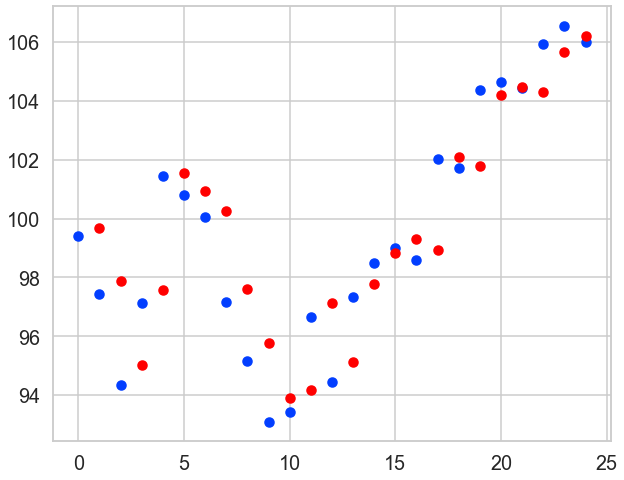

lag_p: 
 [[  1.          97.44999695]
 [  1.          94.33000183]
 [  1.          97.12999725]
 [  1.         101.44000244]
 [  1.         100.80000305]
 [  1.         100.04000092]
 [  1.          97.16000366]
 [  1.          95.16000366]
 [  1.          93.09999847]
 [  1.          93.41000366]
 [  1.          96.63999939]
 [  1.          94.44999695]
 [  1.          97.33000183]
 [  1.          98.48000336]
 [  1.          98.98999786]
 [  1.          98.58999634]
 [  1.         102.04000092]
 [  1.         101.72000122]
 [  1.         104.36000061]
 [  1.         104.62999725]
 [  1.         104.44000244]
 [  1.         105.94999695]
 [  1.         106.54000092]] 
 shape: (23, 1)
lag_p: 
 [[  1.          97.44999695  99.40000153]
 [  1.          94.33000183  97.44999695]
 [  1.          97.12999725  94.33000183]
 [  1.         101.44000244  97.12999725]
 [  1.         100.80000305 101.44000244]
 [  1.         100.04000092 100.80000305]
 [  1.          97.16000366 100.04000092]
 [ 

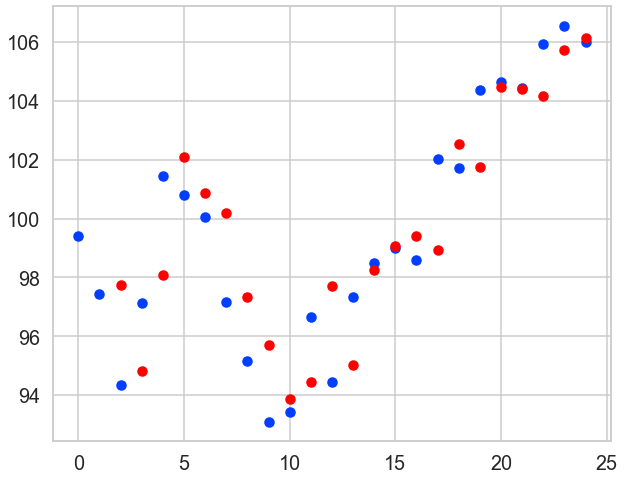

lag_p: 
 [[  1.          94.33000183]
 [  1.          97.12999725]
 [  1.         101.44000244]
 [  1.         100.80000305]
 [  1.         100.04000092]
 [  1.          97.16000366]
 [  1.          95.16000366]
 [  1.          93.09999847]
 [  1.          93.41000366]
 [  1.          96.63999939]
 [  1.          94.44999695]
 [  1.          97.33000183]
 [  1.          98.48000336]
 [  1.          98.98999786]
 [  1.          98.58999634]
 [  1.         102.04000092]
 [  1.         101.72000122]
 [  1.         104.36000061]
 [  1.         104.62999725]
 [  1.         104.44000244]
 [  1.         105.94999695]
 [  1.         106.54000092]] 
 shape: (22, 1)
lag_p: 
 [[  1.          94.33000183  97.44999695]
 [  1.          97.12999725  94.33000183]
 [  1.         101.44000244  97.12999725]
 [  1.         100.80000305 101.44000244]
 [  1.         100.04000092 100.80000305]
 [  1.          97.16000366 100.04000092]
 [  1.          95.16000366  97.16000366]
 [  1.          93.09999847  95.

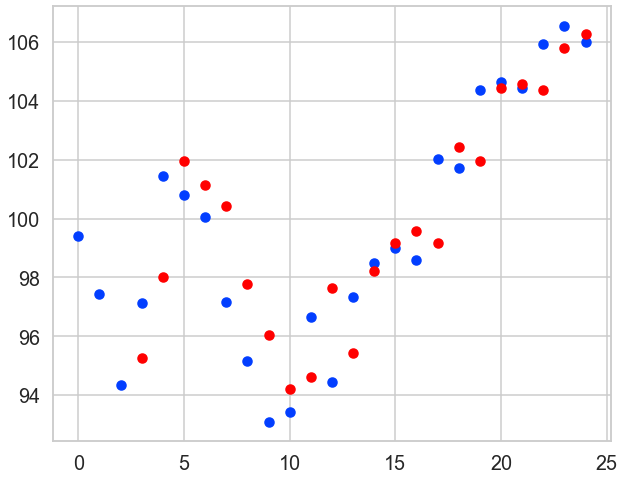

lag_p: 
 [[  1.          97.12999725]
 [  1.         101.44000244]
 [  1.         100.80000305]
 [  1.         100.04000092]
 [  1.          97.16000366]
 [  1.          95.16000366]
 [  1.          93.09999847]
 [  1.          93.41000366]
 [  1.          96.63999939]
 [  1.          94.44999695]
 [  1.          97.33000183]
 [  1.          98.48000336]
 [  1.          98.98999786]
 [  1.          98.58999634]
 [  1.         102.04000092]
 [  1.         101.72000122]
 [  1.         104.36000061]
 [  1.         104.62999725]
 [  1.         104.44000244]
 [  1.         105.94999695]
 [  1.         106.54000092]] 
 shape: (21, 1)
lag_p: 
 [[  1.          97.12999725  94.33000183]
 [  1.         101.44000244  97.12999725]
 [  1.         100.80000305 101.44000244]
 [  1.         100.04000092 100.80000305]
 [  1.          97.16000366 100.04000092]
 [  1.          95.16000366  97.16000366]
 [  1.          93.09999847  95.16000366]
 [  1.          93.41000366  93.09999847]
 [  1.          96.

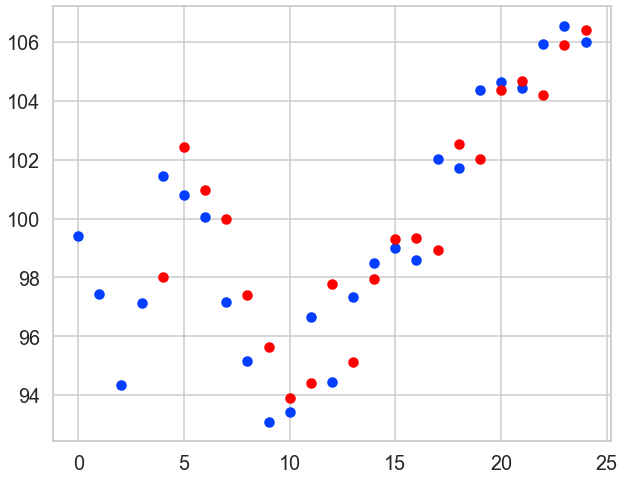

In [358]:
_, _, mse1 = MA(p=1, x=x)
_, _, mse2 = MA(p=2, x=x)
_, _, mse3 = MA(p=3, x=x)
_, _, mse4 = MA(p=4, x=x)

In [359]:
mse1

4.188456353265954

In [360]:
mse2

4.081844482474852

In [361]:
mse3

3.687902695096048

In [362]:
mse4

3.6315715202996937

# Lấy lại chuỗi chứng khoán của tuần 3 <br> Phân tích hàm sample ACF cho chuỗi thời gian trên <br> Tách trend theo 4 phương pháp MA(q), ES($\alpha$), Holt ($\alpha, \beta$), đa thức bậc nhất. Sau khi bỏ đi trend phân tích hàm sample  ACF của chuỗi còn lại 

## Sample ACF = $\dfrac{\hat\gamma(h)}{\hat\gamma(0)}$, <br>$\gamma(h) = n^{-1}\displaystyle\sum_{t=1}^{n-|h|}(x_{t+|h|}-\overline{x})(x_t - \overline{x}), −n < h < n$

In [363]:
def sACF(data: Iterable[Any] = [], lag: int=1):
    n = x.shape[0]
    lag = abs(lag)
    mean = data.mean()
    b = (x - mean)[:n-lag]
    var = np.sum((x-mean)**2)/n
    a = (x-mean)[lag:]
    _gamma = np.sum(a*b) / n
    return _gamma / var

In [364]:
sACF_vals = [sACF(x,h) for h in range(25)]

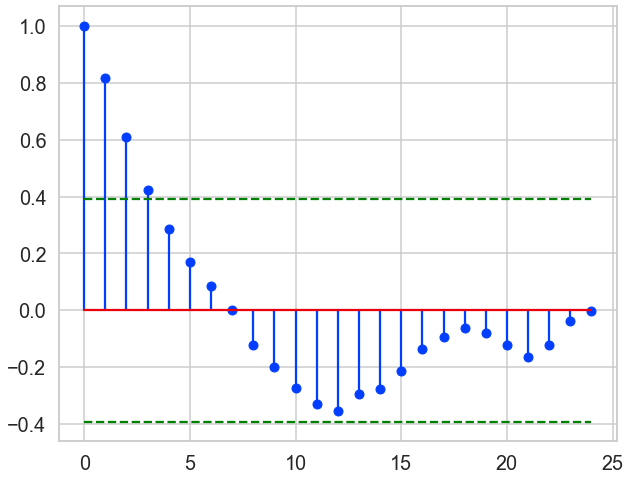

In [388]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.stem(t, sACF_vals)
plt.plot(t, [-1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.plot(t, [1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
# plt.plot(x[:-1], y, color='red')
plt.show()

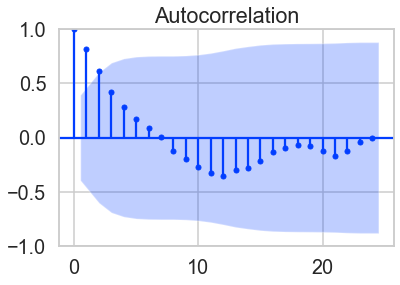

In [398]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa.tsatools import detrend
# fig, ax = plt.subplots(figsize=(10,8))

tsaplots.plot_acf(x, lags=24)
plt.show()

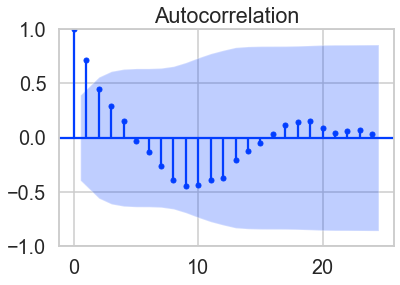

In [401]:
x_p = detrend(x, order=1)
tsaplots.plot_acf(x_p, lags=24)
plt.show()

## MA(q)

In [367]:
def ma(data: Iterable[Any] = [], q: int=2):
    n = data.shape[0]
    if q > 0:
        temp = data[0]*np.ones((q,1))
        data = np.concatenate((temp, data), axis=0)
        temp = data[-1]*np.ones((q,1))
        data = np.concatenate((data, temp), axis=0)

    mt = np.array([np.sum(data[j-q:j+q+1]) for j in range(q, n+q)])/(2*q+1)
    return mt


In [368]:
mt = ma(x, 2)
mt

array([ 97.99600067,  97.54199982,  97.95      ,  98.23000031,
        98.7480011 ,  99.31400146,  98.92000275,  97.25200195,
        95.77400208,  95.09400177,  94.55200043,  94.98600006,
        96.06200104,  97.17799988,  97.56799927,  99.08600006,
        99.96399994, 101.13999939, 102.26799927, 103.43800049,
       104.21999969, 105.18399963, 105.51199951, 105.78600006,
       106.09799957])

In [369]:
# t = range(25)
# fig, ax = plt.subplots(figsize=(10,8))
# plt.scatter(t, x)
# plt.plot(t, mt, color='r')
# plt.show()

## ES($\alpha$): $m_t = \alpha X_t + (1-\alpha) m_{t-1}$

In [370]:
def ES(data: Iterable[Any], alpha: float=0.5):
    mt = [data[0]]
    for i in range(1,len(data)):
        mt.append((1-alpha)*mt[-1]+alpha*data[i])
    return mt

In [371]:
mt_es = ES(x, 0.3)

In [372]:
mt_es

[array([99.40000153]),
 array([98.81500015]),
 array([97.46950066]),
 array([97.36764964]),
 array([98.58935548]),
 array([99.25254975]),
 array([99.4887851]),
 array([98.79015067]),
 array([97.70110657]),
 array([96.32077414]),
 array([95.447543]),
 array([95.80527991]),
 array([95.39869502]),
 array([95.97808707]),
 array([96.72866195]),
 array([97.40706273]),
 array([97.76194281]),
 array([99.04536024]),
 array([99.84775254]),
 array([101.20142696]),
 array([102.22999805]),
 array([102.89299936]),
 array([103.81009864]),
 array([104.62906932]),
 array([105.04034853])]

## Polynomial: $m_t = c_0 + c_1t$

In [373]:
def PS(data: Iterable[Any] = [], p :int=2):
    n = data.shape[0]
    t = np.array(range(n), dtype=np.float32).reshape((n,1))
    # print(t)
    t = np.concatenate((np.ones((n,1)), t), axis=1)
    # print(t)
    beta = (np.linalg.inv((np.dot(t.T, t))) @ t.T) @ data
    print(f'beta: \n {beta} \n shape:  {beta.shape}')
    y = t@beta
    mse = np.mean((y-data)**2)
    return (y, beta, mse)

In [374]:
mt_ps, beta, mse = PS(x)

beta: 
 [[95.07563185]
 [ 0.37563071]] 
 shape:  (2, 1)


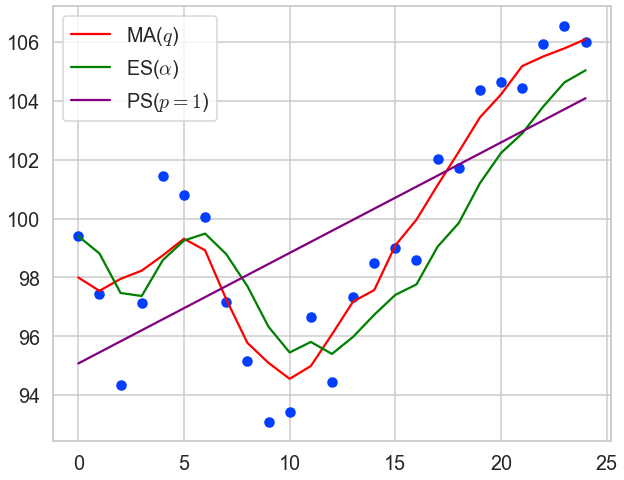

In [375]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(t, x)
ax.plot(t, mt, color='r', label=r'MA($q$)')
ax.plot(t, mt_es, color='g', label=r'ES($\alpha$)')
ax.plot(t, mt_ps, color='purple', label=r'PS($p=1$)')
plt.legend()
plt.show()

## Holt-Winter <br> $m_t = (1-\alpha)(m_{t-1} + b_{t-1}) + \alpha X_t$ <br> $b_t = (1 - \beta)b_{t-1} + \beta (m_t - m_{t-1})$


In [376]:
def HW(data: Iterable[Any], alpha: float=0.5, beta: float=0.5):
    mt = [data[0]]
    bt = [0]

    for i in range(1,len(data)):
        mt.append((1-alpha)*(mt[-1] + bt[-1]) + alpha*data[i])
        bt.append((1-beta)*bt[-1] + beta*(mt[i]- mt[i-1]))
    return mt

In [377]:
mt_hw = HW(x, 0.4, 0.6)

In [378]:
mt_hw

[array([99.40000153]),
 array([98.61999969]),
 array([96.62319989]),
 array([95.99475064]),
 array([97.61414236]),
 array([99.24798405]),
 array([100.29677277]),
 array([99.71242186]),
 array([97.94923094]),
 array([95.39789977]),
 array([93.43960683]),
 array([93.5495246]),
 array([93.48118823]),
 array([94.82470246]),
 array([96.69208345]),
 array([98.44561063]),
 array([99.46837926]),
 array([101.25123037]),
 array([102.38224609]),
 array([103.95791651]),
 array([105.1078176]),
 array([105.60708345]),
 array([106.23054132]),
 array([106.77328698]),
 array([106.82694535])]

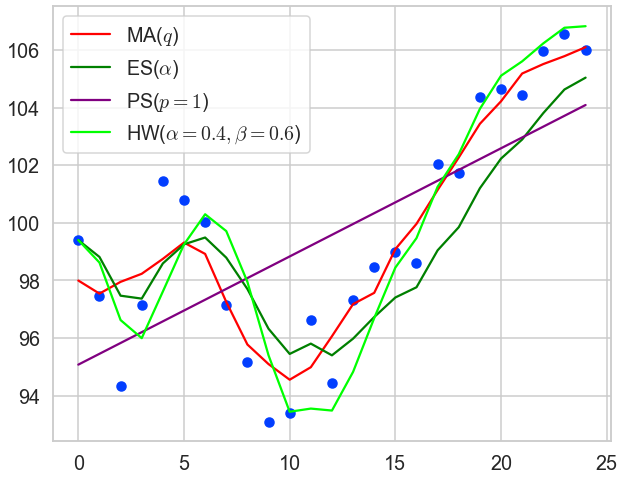

In [379]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(t, x)
ax.plot(t, mt, color='r', label=r'MA($q$)')
ax.plot(t, mt_es, color='g', label=r'ES($\alpha$)')
ax.plot(t, mt_ps, color='purple', label=r'PS($p=1$)')
ax.plot(t, mt_hw, color='lime', label=r'HW($\alpha=0.4, \beta=0.6$)')
plt.legend()
plt.show()

# Detrend

In [428]:
x1 = x - mt.reshape(x.shape)
x2 = x - np.array(mt_es).reshape(x.shape)
x3 = x - np.array(mt_ps).reshape(x.shape)
x4 = x - np.array(mt_hw).reshape(x.shape)

In [429]:
sACF_vals_ma = [sACF(x1,h) for h in range(25)]
sACF_vals_es = [sACF(x2,h) for h in range(25)]
sACF_vals_ps = [sACF(x3,h) for h in range(25)]
sACF_vals_hw = [sACF(x4,h) for h in range(25)]

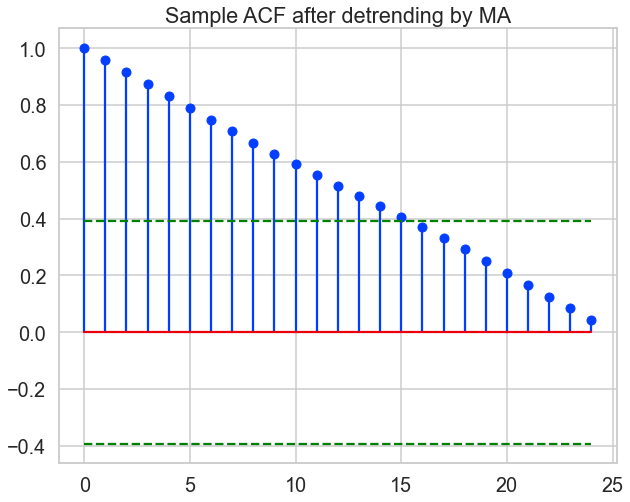

In [430]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.stem(t, sACF_vals_ma)
plt.plot(t, [-1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.plot(t, [1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.title('Sample ACF after detrending by MA')
plt.show()

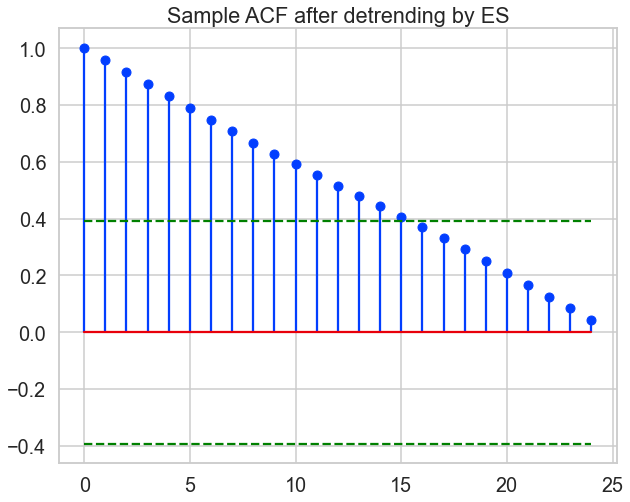

In [431]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.stem(t, sACF_vals_es)
plt.plot(t, [-1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.plot(t, [1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.title('Sample ACF after detrending by ES')
plt.show()

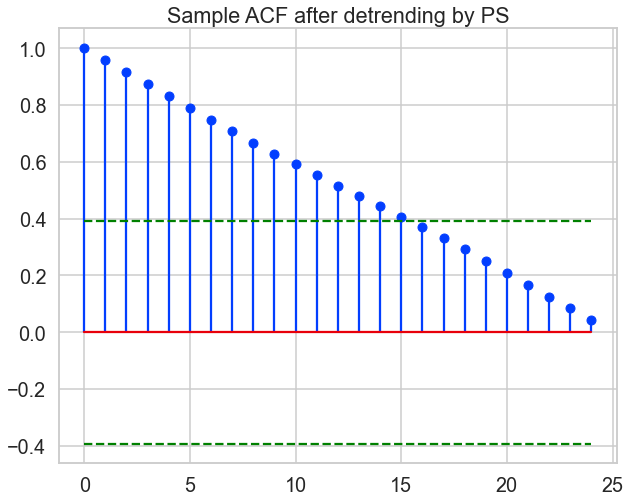

In [432]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.stem(t, sACF_vals_ps)
plt.plot(t, [-1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.plot(t, [1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.title('Sample ACF after detrending by PS')
plt.show()

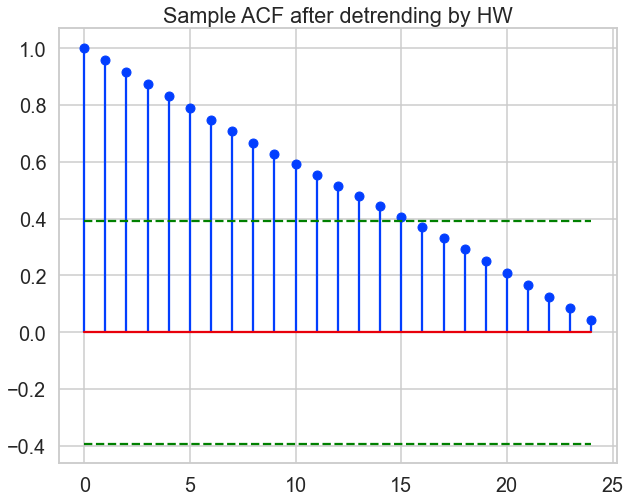

In [433]:
t = range(25)
fig, ax = plt.subplots(figsize=(10,8))
plt.stem(t, sACF_vals_hw)
plt.plot(t, [-1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.plot(t, [1.96/np.sqrt(x.shape[0])]*x.shape[0], '--', color='green')
plt.title('Sample ACF after detrending by HW')
plt.show()